In [1]:
class Function:

    def __init__(self):
        pass

    def __call__(self, *args, **kwargs):
        pass

    def prime(self):
        pass

    def parameters(self):
        return dict()

In [2]:
def gradient_descent(
    f: Function,
    x_init: float,
    learning_rate: float = 0.1,
    n_iter: int = 1000,
    return_all: bool = False        
):
    xs = [x_init]

    for n in range(n_iter):
        x = xs[-1]
        grad = f.prime(x)
        x_next = x - learning_rate * grad
        xs.append(x_next)
    
    if return_all:
        return xs
    else:
        return x

In [3]:
class Square(Function):
    def __call__(self, x):
        return x**2
    
    def prime(self, x):
        return 2*x

In [4]:
f = Square()

gradient_descent(f, x_init=5.0)

7.688949513507002e-97

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gradient_descent(f, xs: list, x_min: float, x_max: float, label: str = "f(x)"):
    ys = [f(x) for x in xs]

    grid = np.linspace(x_min, x_max, 1000)
    fs = [f(x) for x in grid]

    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(8, 8))
        plt.plot(grid, fs, label=label, c="b", lw=2.0)
        plt.plot(xs, ys, label="gradient descent", c="r", lw=4.0)
        plt.scatter(xs, ys, c="r", s=100.0)
        plt.legend()
        plt.show()

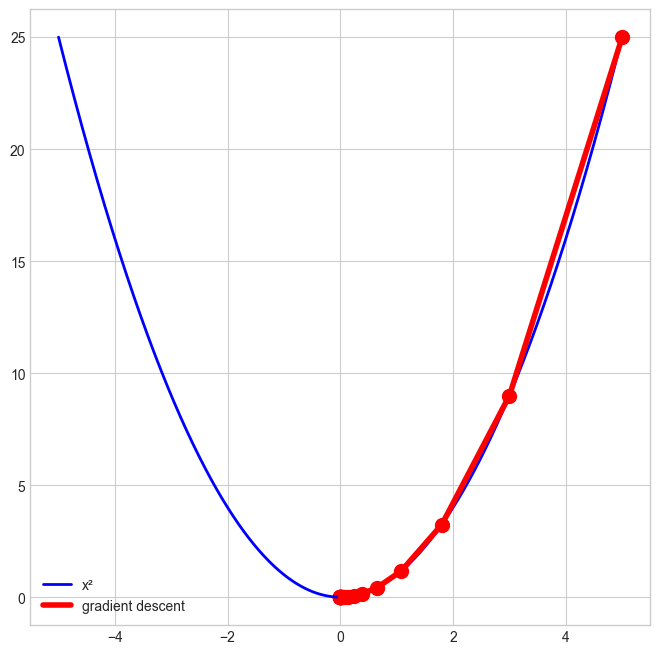

In [6]:
xs = gradient_descent(f, x_init=5.0, n_iter=25, learning_rate=0.2, return_all=True)
plot_gradient_descent(f, xs, x_min=-5, x_max=5, label="x²")

In [7]:
class CosPlusSquare(Function):
    def __call__(self, x):
        return np.sin(x) + 0.5*x
    
    def prime(self, x):
        return np.cos(x) + 0.5

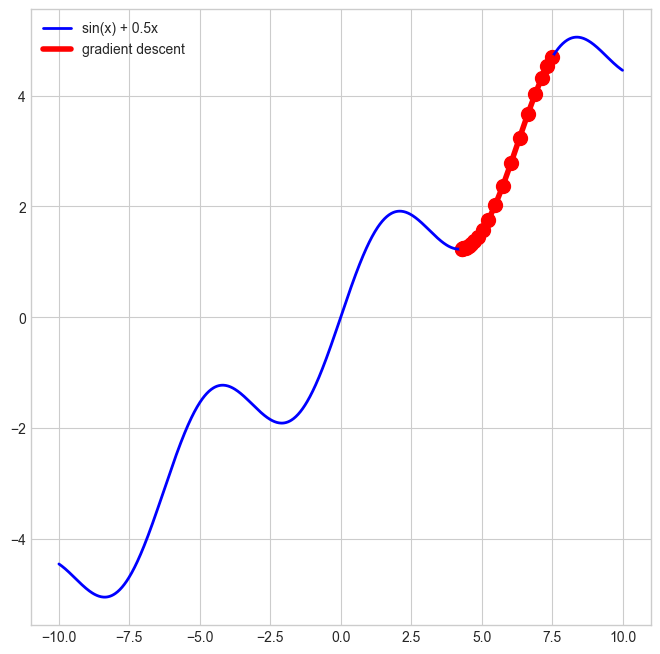

In [8]:
f = CosPlusSquare()

xs = gradient_descent(f, x_init=7.5, n_iter=20, learning_rate=0.2, return_all=True)
plot_gradient_descent(f, xs, -10, 10, label="sin(x) + 0.5x")

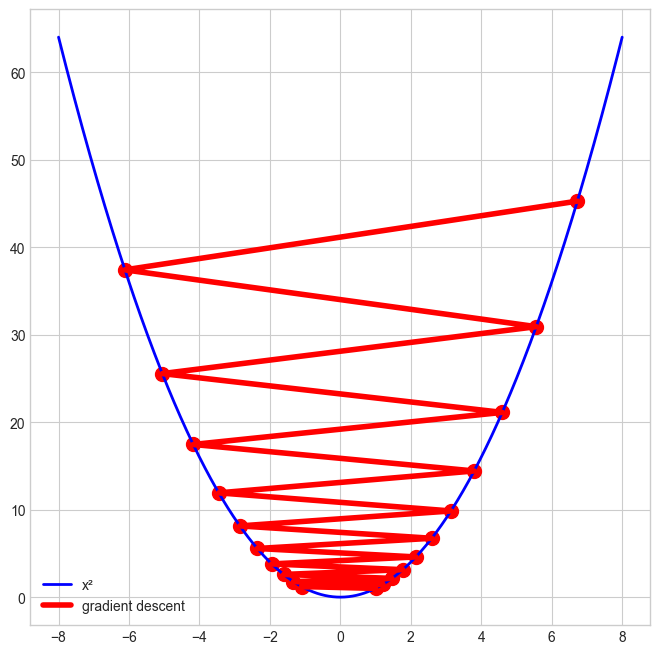

In [9]:
f = Square()

xs = gradient_descent(f, x_init=1.0, n_iter=20, learning_rate=1.05, return_all=True)
plot_gradient_descent(f, xs, -8, 8, label="x²")